In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import clear_output
clear_output()

In [57]:
"""
data 
"""

d = int(1e3)
sel = 0
experiment = ['new_benchmark_methods_convex_QP_d_1000','new_benchmark_methods_concave_QP_d_1000',\
             'new_benchmark_methods_neutral_QP_d_1000','benchmark_methods_neutral_LSE_QP_d_1000',\
                'benchmark_methods_concave_LSE_QP_d_1000']
file_name_basis = experiment[sel]
subdf = pd.read_csv(file_name_basis+'.csv')
subdf.drop(columns=['Unnamed: 0'],inplace=True)
subdf.head(20)

,repID,vals,times,method,iters,extrapolation,dc_updates,linesearch,pID
0,0,-7.520534,1.366081,SDCe-LS,333,yes,yes,yes,0
1,0,-7.013349,0.601886,SDCe,167,yes,yes,no,0
2,0,-7.013349,0.434450,SCe-LS,144,yes,no,yes,0
3,0,-7.013349,0.432189,SCe,170,yes,no,no,0
4,0,-7.468601,0.673690,SDC-LS,118,no,yes,yes,0
5,0,-7.013341,2.898532,SDC,964,no,yes,no,0
6,0,-7.013348,0.371772,SC-LS,147,no,no,yes,0
7,0,-7.013340,1.968424,SC,905,no,no,no,0
8,1,-6.892331,0.296259,SDCe-LS,84,yes,yes,yes,0
9,1,-6.892331,0.809614,SDCe,183,yes,yes,no,0


In [58]:
ordered_rescaled_vals = []
for problemID in subdf['pID'].unique():
    overall_vals = np.array(list(subdf[subdf['pID']==problemID]['vals']))
    best_val_problem = np.min(overall_vals)
    worst_val_problem = np.max(overall_vals)
    rescaled_vals = (overall_vals-best_val_problem)/(worst_val_problem-best_val_problem)
    ordered_rescaled_vals+=list(rescaled_vals)
subdf['normalized vals'] = ordered_rescaled_vals

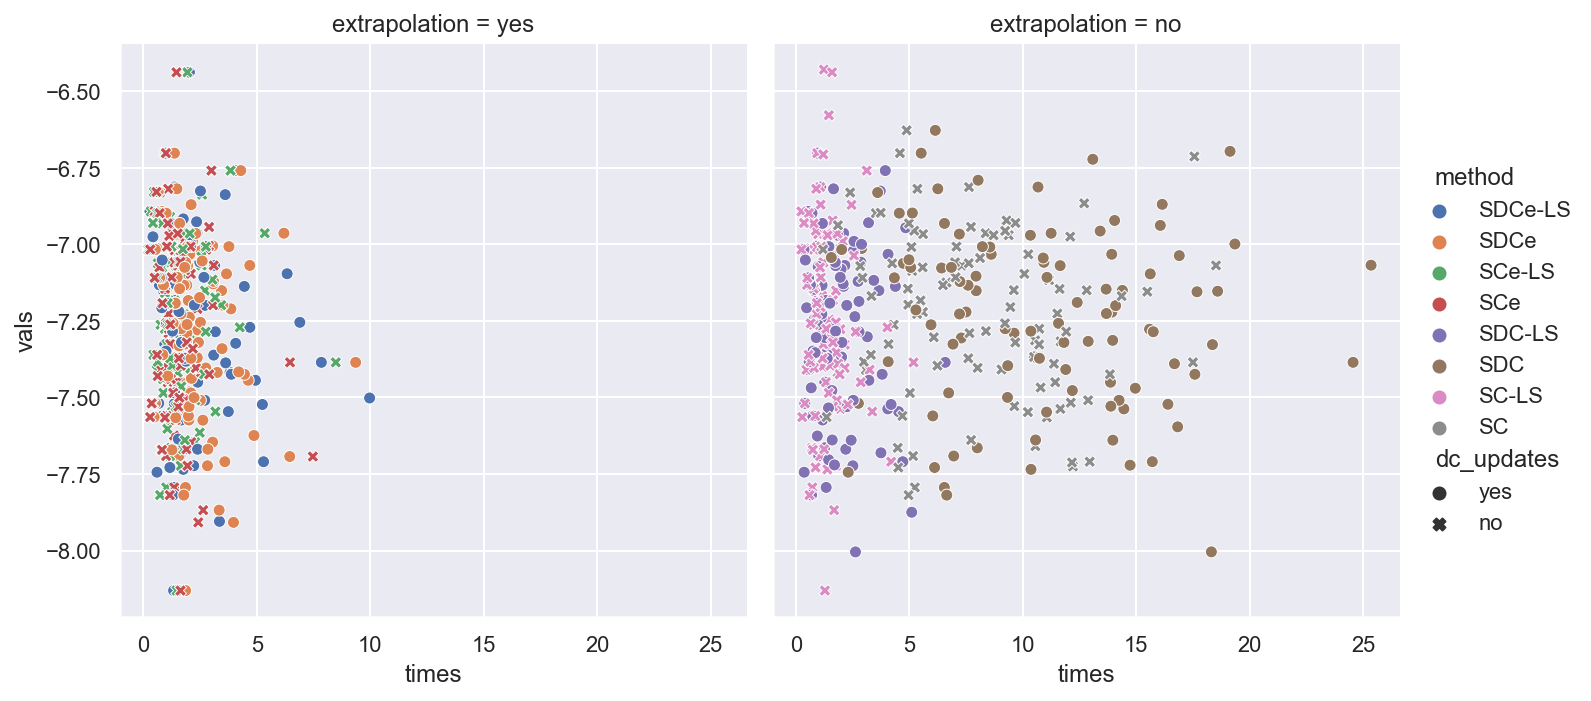

In [59]:
sns.set_theme()
sns.relplot(
    data=subdf, x="times", y="vals",
    hue="method", style="dc_updates",
    kind="scatter",col='extrapolation'
)
plt.savefig('QminQ_neutral.pdf',dpi=500)

In [60]:
for f in ['yes','no']:
    if f=='yes':
        ex = 'dc_updates'
    else:
        ex = 'no-dc_updates'
    subgroup = subdf[(subdf['dc_updates']==f)]
    sub = [ex]
    print('subgroup: ('+str(sub)+')')
    print('avg. time: '+str(subgroup['times'].mean()))
    print('median time: '+str(subgroup['times'].median()))
    print('avg. val: '+str(subgroup['vals'].mean()))
    print('median val: '+str(subgroup['vals'].median()))
    print('avg. norm. val: '+str(subgroup['normalized vals'].mean()))
    print('median norm. val: '+str(subgroup['normalized vals'].median()))
    print('avg. #iters: '+str(subgroup['iters'].mean()))
    print('median #iters: '+str(subgroup['iters'].median()))
    print(' ')

subgroup: (['dc_updates'])
avg. time: 4.303424588441849
median time: 2.25201153755188
avg. val: -7.266860107525129
median val: -7.245807981878732
avg. norm. val: 0.5053700275178257
median norm. val: 0.5149227169256476
avg. #iters: 640.4425
median #iters: 278.5
 
subgroup: (['no-dc_updates'])
avg. time: 3.121143926978111
median time: 1.6385811567306519
avg. val: -7.249360835295371
median val: -7.254635240403076
avg. norm. val: 0.5247892813216993
median norm. val: 0.5281930322718271
avg. #iters: 666.42
median #iters: 307.5
 


In [61]:
for f in ['yes','no']:
    if f=='yes':
        ex = 'extrapolation'
    else:
        ex = 'no-extrapolation'
    subgroup = subdf[(subdf['extrapolation']==f)]
    sub = [ex]
    print('subgroup: ('+str(sub)+')')
    print('avg. time: '+str(subgroup['times'].mean()))
    print('median time: '+str(subgroup['times'].median()))
    print('avg. val: '+str(subgroup['vals'].mean()))
    print('median val: '+str(subgroup['vals'].median()))
    print('avg. norm. val: '+str(subgroup['normalized vals'].mean()))
    print('median norm. val: '+str(subgroup['normalized vals'].median()))
    print('avg. #iters: '+str(subgroup['iters'].mean()))
    print('median #iters: '+str(subgroup['iters'].median()))
    print(' ')

subgroup: (['extrapolation'])
avg. time: 1.932096951007843
median time: 1.6348730325698853
avg. val: -7.268415415701959
median val: -7.257877461782423
avg. norm. val: 0.5063826515953676
median norm. val: 0.5106225119665723
avg. #iters: 291.51
median #iters: 267.0
 
subgroup: (['no-extrapolation'])
avg. time: 5.492471564412117
median time: 3.397787094116211
avg. val: -7.247805527118541
median val: -7.227300515425716
avg. norm. val: 0.5237766572441577
median norm. val: 0.5378887931731424
avg. #iters: 1015.3525
median #iters: 647.5
 


In [62]:
if sel<=2:
    for f in ['SDCe-LS','SDC-LS','SDCe','SDC','SCe-LS','SC-LS','SCe','SC']:
        subgroup = subdf[(subdf['method']==f)]
        sub = [f]
        print(' copy string:: '+str(subgroup['times'].mean())[:4]+' & '+str(subgroup['vals'].mean())[:7]+' & '+str(subgroup['vals'].median())[:7]\
             +' & '+str(subgroup['iters'].mean())[:5])
        print(' ')
        print('subgroup: ('+str(sub)+')')
        print('avg. time: '+str(subgroup['times'].mean()))
        print('median time: '+str(subgroup['times'].median()))
        print('avg. val: '+str(subgroup['vals'].mean()))
        print('median val: '+str(subgroup['vals'].median()))
        print('avg. norm. val: '+str(subgroup['normalized vals'].mean()))
        print('median norm. val: '+str(subgroup['normalized vals'].median()))
        print('avg. #iters: '+str(subgroup['iters'].mean()))
        print('median #iters: '+str(subgroup['iters'].median()))
        print(' ')

 copy string:: 2.19 & -7.2640 & -7.2502 & 213.7
 
subgroup: (['SDCe-LS'])
avg. time: 2.195904502868652
median time: 1.7093796730041504
avg. val: -7.264077740292239
median val: -7.2502216401855915
avg. norm. val: 0.5092772162186652
median norm. val: 0.528669319156102
avg. #iters: 213.76
median #iters: 167.5
 
 copy string:: 1.93 & -7.2837 & -7.2484 & 187.9
 
subgroup: (['SDC-LS'])
avg. time: 1.9305610132217408
median time: 1.5430973768234253
avg. val: -7.283748228189044
median val: -7.248494262008257
avg. norm. val: 0.4864608709558905
median norm. val: 0.5062400076090591
avg. #iters: 187.95
median #iters: 160.5
 
 copy string:: 2.35 & -7.2839 & -7.2620 & 349.8
 
subgroup: (['SDCe'])
avg. time: 2.352336976528168
median time: 2.024143934249878
avg. val: -7.283934183324545
median val: -7.262072123702617
avg. norm. val: 0.49093559292319333
median norm. val: 0.5055114788373896
avg. #iters: 349.8
median #iters: 320.0
 
 copy string:: 10.7 & -7.2356 & -7.2174 & 1810.
 
subgroup: (['SDC'])
avg.